<a href="https://colab.research.google.com/github/Jeremy-22/Red-Neuronal/blob/main/Red_con_regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import mlflow
mlflow.tensorflow.autolog()

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adamax
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras import regularizers

In [ ]:
dataset= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = dataset


x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype("float32")
x_testv = x_testv.astype("float32")
x_trainv /= 255
x_testv /= 255

In [ ]:
num_class=10
y_trainc = keras.utils.to_categorical(y_train, num_class)
y_testc = keras.utils.to_categorical(y_test, num_class)

In [ ]:
model3 = Sequential()
model3.add(Dense(600, activation='tanh', kernel_regularizer=regularizers.L1(1e-5), input_shape=(784,)))
model3.add(Dense(200, activation='sigmoid', kernel_regularizer=regularizers.L1(1e-5)))
model3.add(Dense(100, activation='leaky_relu', kernel_regularizer=regularizers.L1(1e-5)))
model3.add(Dense(50, activation = 'relu',kernel_regularizer=regularizers.L1(1e-5)))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model3.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 15:53:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bc504cc585354e598e125892a87ee743', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1315 - accuracy: 0.9288 - val_loss: 0.1079 - val_accuracy: 0.9375
Epoch 2/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0986 - accuracy: 0.9379 - val_loss: 0.0882 - val_accuracy: 0.9416
Epoch 3/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0813 - accuracy: 0.9455 - val_loss: 0.0768 - val_accuracy: 0.9433
Epoch 4/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0700 - accuracy: 0.9525 - val_loss: 0.0715 - val_accuracy: 0.9422
Epoch 5/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0612 - accuracy: 0.9590 - val_loss: 0.0606 - val_accuracy: 0.9557
Epoch 6/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0553 - accuracy: 0.9629 - val_loss: 0.0535 - val_accuracy: 0.9654
Epoch 7/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0511 - accuracy: 0.9664 - val_loss: 0.0504 - val_accuracy:

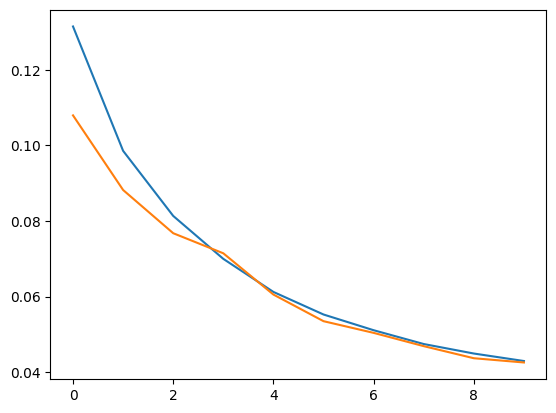

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model3 = Sequential()
model3.add(Dense(600, activation='tanh', kernel_regularizer=regularizers.L2(1e-4), input_shape=(784,)))
model3.add(Dense(200, activation='sigmoid', kernel_regularizer=regularizers.L2(1e-4)))
model3.add(Dense(100, activation='leaky_relu', kernel_regularizer=regularizers.L2(1e-4)))
model3.add(Dense(50, activation = 'relu',kernel_regularizer=regularizers.L2(1e-4)))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model3.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 15:55:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c4ac4dcb20b34e5b828f2641d7be85fc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
600/600 [==============================] - 17s 26ms/step - loss: 0.2000 - accuracy: 0.8311 - val_loss: 0.1427 - val_accuracy: 0.8956
Epoch 2/10
600/600 [==============================] - 12s 20ms/step - loss: 0.1126 - accuracy: 0.9224 - val_loss: 0.0995 - val_accuracy: 0.9238
Epoch 3/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0861 - accuracy: 0.9341 - val_loss: 0.0804 - val_accuracy: 0.9317
Epoch 4/10
600/600 [==============================] - 12s 20ms/step - loss: 0.0715 - accuracy: 0.9421 - val_loss: 0.0661 - val_accuracy: 0.9471
Epoch 5/10
600/600 [==============================] - 13s 21ms/step - loss: 0.0633 - accuracy: 0.9490 - val_loss: 0.0678 - val_accuracy: 0.9358
Epoch 6/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0580 - accuracy: 0.9531 - val_loss: 0.0551 - val_accuracy: 0.9567
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0543 - accuracy: 0.9567 - val_loss: 0.0545 - val_accuracy:

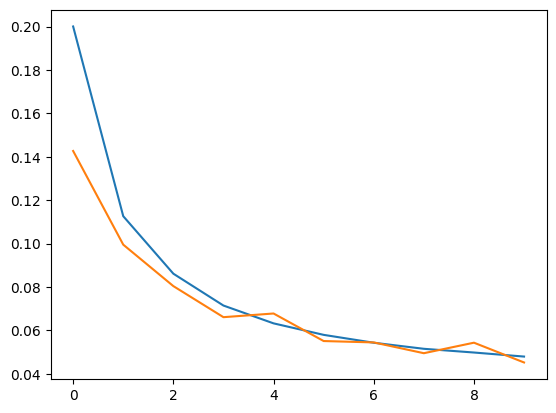

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model3 = Sequential()
model3.add(Dense(600, activation='tanh', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), input_shape=(784,)))
model3.add(Dense(200, activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model3.add(Dense(100, activation='leaky_relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model3.add(Dense(50, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model3.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 16:00:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0c283bb5b82149989d518edd650d5c5b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
600/600 [==============================] - 11s 19ms/step - loss: 0.1749 - accuracy: 0.9023 - val_loss: 0.1285 - val_accuracy: 0.9243
Epoch 2/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1185 - accuracy: 0.9135 - val_loss: 0.1078 - val_accuracy: 0.9126
Epoch 3/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0964 - accuracy: 0.9276 - val_loss: 0.0879 - val_accuracy: 0.9345
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0842 - accuracy: 0.9374 - val_loss: 0.0749 - val_accuracy: 0.9478
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0767 - accuracy: 0.9449 - val_loss: 0.0756 - val_accuracy: 0.9428
Epoch 6/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0714 - accuracy: 0.9500 - val_loss: 0.0647 - val_accuracy: 0.9594
Epoch 7/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0680 - accuracy: 0.9527 - val_loss: 0.0620 - val_accuracy:

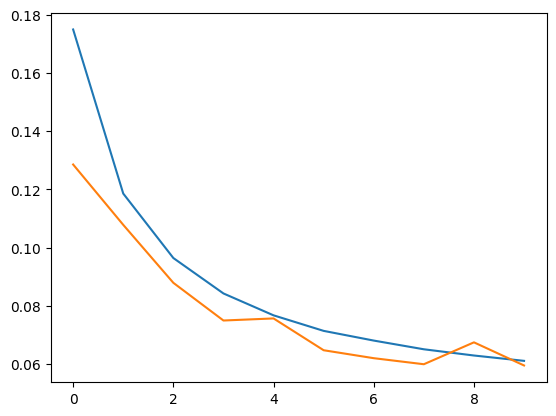

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [38]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(600, activation='tanh', input_shape=(784,)))
model3.add(Dense(200, activation='sigmoid'))
model3.add(Dropout(0.2))
#model3.add(Dense(200))
#model3.add(Activation('tanh'))
model3.add(Dense(100, activation='leaky_relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(10, activation='softmax'))

In [41]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [42]:
history = model3.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

600/600 [==============================] - 12s 18ms/step - loss: 0.0971 - accuracy: 0.8361 - val_loss: 0.0466 - val_accuracy: 0.9255
Epoch 2/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0433 - accuracy: 0.9301 - val_loss: 0.0390 - val_accuracy: 0.9345
Epoch 3/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0318 - accuracy: 0.9480 - val_loss: 0.0264 - val_accuracy: 0.9573
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0250 - accuracy: 0.9590 - val_loss: 0.0211 - val_accuracy: 0.9643
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0210 - accuracy: 0.9655 - val_loss: 0.0182 - val_accuracy: 0.9688
Epoch 6/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0178 - accuracy: 0.9710 - val_loss: 0.0180 - val_accuracy: 0.9705
Epoch 7/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0151 - accuracy: 0.9758 - val_loss: 0.0156 - val_accuracy: 0.9753
Epoc

1/1 [==============================] - 0s 122ms/step


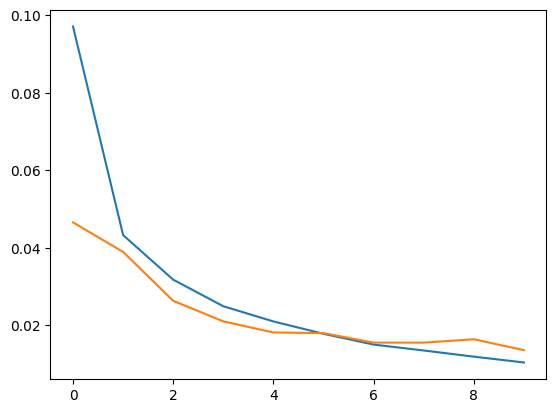

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [48]:
model3 = Sequential()
model3.add(Dense(600, activation='tanh', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), input_shape=(784,)))
model3.add(Dense(200, activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model3.add(Dropout(0.2))
model3.add(Dense(100, activation='leaky_relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model3.add(Dense(50, activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [49]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [50]:
history = model3.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 17:00:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '117d5f579127448687fbd8f485000b34', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
600/600 [==============================] - 13s 19ms/step - loss: 0.3566 - accuracy: 0.7711 - val_loss: 0.1995 - val_accuracy: 0.9116
Epoch 2/10
600/600 [==============================] - 11s 19ms/step - loss: 0.1706 - accuracy: 0.8922 - val_loss: 0.1278 - val_accuracy: 0.9155
Epoch 3/10
600/600 [==============================] - 11s 19ms/step - loss: 0.1259 - accuracy: 0.9040 - val_loss: 0.0985 - val_accuracy: 0.9344
Epoch 4/10
600/600 [==============================] - 11s 19ms/step - loss: 0.1068 - accuracy: 0.9183 - val_loss: 0.0897 - val_accuracy: 0.9337
Epoch 5/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0959 - accuracy: 0.9263 - val_loss: 0.0817 - val_accuracy: 0.9443
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0889 - accuracy: 0.9335 - val_loss: 0.0776 - val_accuracy: 0.9454
Epoch 7/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0841 - accuracy: 0.9373 - val_loss: 0.0711 - val_accuracy:

1/1 [==============================] - 0s 85ms/step


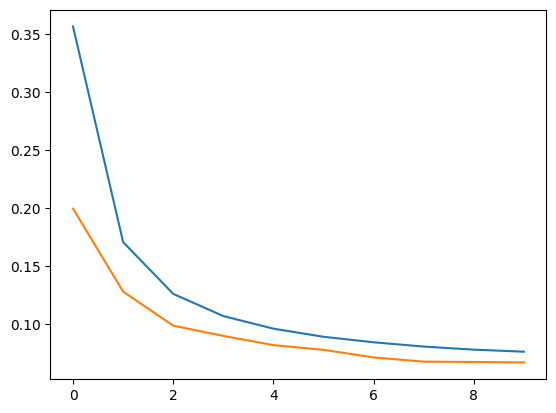

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [53]:
model3.save("red.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
modell = tf.keras.models.load_model('red.h5')

In [62]:
modell = Sequential()
modell.add(Dense(600, activation='tanh', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), input_shape=(784,)))
modell.add(Dense(200, activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
modell.add(Dropout(0.2))
modell.add(Dense(100, activation='leaky_relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
modell.add(Dense(50, activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))
modell.add(Dense(20, activation='elu', kernel_regularizer=regularizers.L2(l2=1e-4)))
modell.add(Dropout(0.2))
modell.add(Dense(10, activation='softmax'))

In [65]:
modell.compile(loss='binary_crossentropy', optimizer=Adamax(), metrics=['accuracy'])

In [66]:
history = modell.fit(x_trainv, y_trainc,
                    batch_size=100,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

2024/02/15 17:22:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cc39a2018422439d99b49d368ea204ec', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/30
600/600 [==============================] - 15s 21ms/step - loss: 0.3650 - accuracy: 0.5721 - val_loss: 0.2012 - val_accuracy: 0.8703
Epoch 2/30
600/600 [==============================] - 12s 20ms/step - loss: 0.2041 - accuracy: 0.8078 - val_loss: 0.1377 - val_accuracy: 0.9017
Epoch 3/30
600/600 [==============================] - 12s 19ms/step - loss: 0.1603 - accuracy: 0.8598 - val_loss: 0.1145 - val_accuracy: 0.9142
Epoch 4/30
600/600 [==============================] - 12s 19ms/step - loss: 0.1388 - accuracy: 0.8859 - val_loss: 0.1014 - val_accuracy: 0.9243
Epoch 5/30
600/600 [==============================] - 12s 20ms/step - loss: 0.1255 - accuracy: 0.9002 - val_loss: 0.0939 - val_accuracy: 0.9319
Epoch 6/30
600/600 [==============================] - 12s 21ms/step - loss: 0.1159 - accuracy: 0.9095 - val_loss: 0.0875 - val_accuracy: 0.9374
Epoch 7/30
600/600 [==============================] - 12s 20ms/step - loss: 0.1093 - accuracy: 0.9178 - val_loss: 0.0841 - val_accuracy:

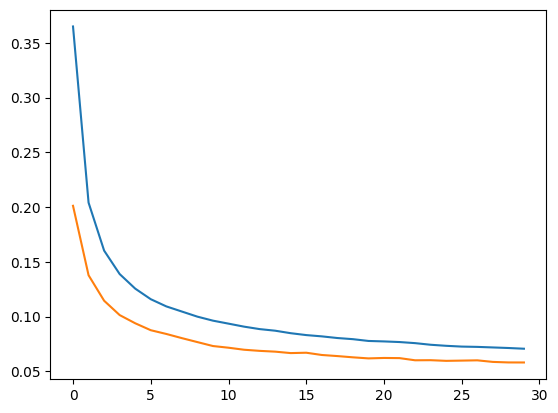

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

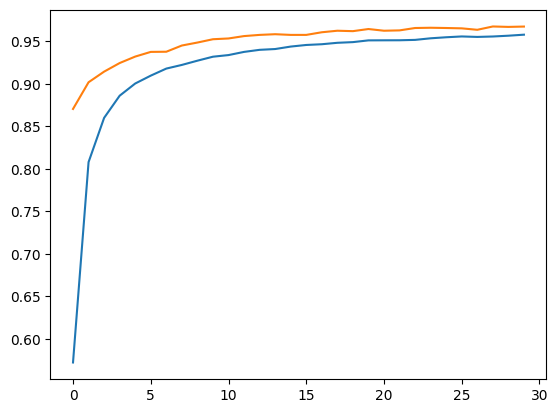

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])